In [1]:
import torchvision.datasets as dsets

In [2]:
train_dataset = dsets.MNIST(root='/ml/pymnist',  #Sélectionnez le Répertoire racine des données
                            train=True,#Sélectionner un ensemble d'entraînement
                            transform=None,# Le prétraitement des données n'est pas envisagé 
                            download=True # Téléchargement d'images depuis le Web 
)

test_dataset = dsets.MNIST(root='/ml/pymnist',#Sélectionnez le Répertoire racine des données
                           train=False,#Sélectionnez l'ensemble de test
                           transform=None,# Aucun prétraitement des données n'est envisagé 
                           download=True # Téléchargement d'images depuis le Web 
)

C:\Users\Yakoubi\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\Yakoubi\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


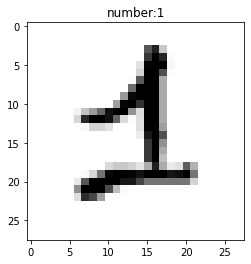

In [3]:
x_train=train_dataset.train_data.numpy().reshape(-1,28*28)  #Oui.6Dix mille.28X28Photos de, Convertir en un tableau unidimensionnel 
#print(x_train.shape)  #Produits;(60000, 784)  

imgIndex = 24

# Prenez une des photos 
x1 = x_train[imgIndex].reshape(28,28)  # Convertir un tableau unidimensionnel en matrice de second ordre  28X28, Restaurer la matrice d'image 
#print(x1)  #Produits28X28Matrice bidimensionnelle


y_train = train_dataset.train_labels.numpy()  #Convertir ennumpyDonnées
#print(y_train.shape) #Produitstorch.Size([60000]) ,Oui.60000 Étiquette de l'image , Correspond exactement au nombre d'images ci - dessus 

y1 = y_train[imgIndex]
#print(y1)  #Produits：5

#Affichage de l'image
import matplotlib.pyplot as plt
plt.imshow(x1,cmap=plt.cm.binary)  # Afficher les paramètres de l'image 
plt.title("number:" + str(y1))
plt.show()

C:\Users\Yakoubi\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\Yakoubi\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
C:\Users\Yakoubi\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\Yakoubi\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


current epoch is： 0
loss:  2.311159871023115
loss:  0.7918173232566014
loss:  0.7595045031886343
loss:  0.50698236899967
loss:  0.5453771725616731
loss:  0.635361022976755
current epoch is： 1
loss:  0.4547445007621296
loss:  0.5113726306377483
loss:  0.46223860318142074
loss:  0.30612529284846535
loss:  0.5324756439087059
loss:  0.30769637878126765
current epoch is： 2
loss:  0.30204827165524384
loss:  0.26597029588185583
loss:  0.3702339340855311
loss:  0.22381662544322306
loss:  0.46556272857372166
loss:  0.318826222132868
current epoch is： 3
loss:  0.31661723094441496
loss:  0.38188258399500824
loss:  0.22901689312794146
loss:  0.5397577138354152
loss:  0.328461005361846
loss:  0.18643804535559294
current epoch is： 4
loss:  0.30125316143395475
loss:  0.42060568759326217
loss:  0.32033289914256174
loss:  0.43604423759475225
loss:  0.2412180770856841
loss:  0.13826898348865746
Précision： 86.53 %


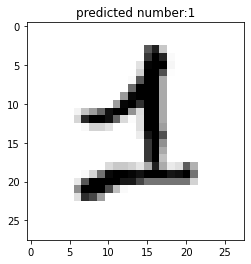

In [4]:
from collections import OrderedDict

import numpy as np

import torch
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np

batch_size = 100
#MNIST dataset
train_dataset = dsets.MNIST(root='/ml/pymnist',  #Sélectionnez le Répertoire racine des données
                            train=True,#Sélectionner un ensemble d'entraînement
                            transform=None,# Le prétraitement des données n'est pas envisagé 
                            download=False # Téléchargement d'images depuis le Web , Premier choix True
)

test_dataset = dsets.MNIST(root='/ml/pymnist',#Sélectionnez le Répertoire racine des données
                           train=False,#Sélectionnez l'ensemble de test
                           transform=None,# Aucun prétraitement des données n'est envisagé 
                           download=False# Téléchargement d'images depuis le Web , Premier choix True
)

x_train=train_dataset.train_data.numpy().reshape(-1,28*28)
y_train_tmp=train_dataset.train_labels.reshape(train_dataset.train_labels.shape[0],1)
y_train=torch.zeros(y_train_tmp.shape[0],10).scatter_(1,y_train_tmp,1).numpy()
#print(y_train)

x_test = test_dataset.test_data.numpy().reshape(-1,28*28)
y_test_tmp = test_dataset.test_labels.reshape(test_dataset.test_labels.shape[0],1)
y_test = torch.zeros(y_test_tmp.shape[0],10).scatter_(1,y_test_tmp,1).numpy()

class Relu:
    def __init__(self):
        self.x=None
        return
    def forward(self,x):
        self.x=np.maximum(0,x)
        out=self.x
        return out
    def backward(self,dout):
        dx=dout
        dx[self.x<=0]=0
        #print("dout:",dx)
        return dx


class Affine:
    def __init__(self,W,b):
        self.W=W
        self.b=b
        self.x=None
        self.dW=None
        self.db=None
        return
    def forward(self,x):
        self.x=x
        out=np.dot(x,self.W)+self.b
        return out
    def backward(self,dout):
        dx=np.dot(dout,self.W.T)
        self.dW=np.dot(self.x.T,dout)
        self.db=np.sum(dout,axis=0)
        #print("db:",self.db)
        return dx

class SoftmaxWithLoss:
    def __init__(self):
        self.loss=None #Pertes
        self.p=None #softmaxProduits
        self.y=None # Les données de surveillance représentent la valeur réelle ,one-hot vector
        return
    def softmax(self,x):
        if x.ndim==2:  #ndimRenvoie la dimension du tableau,Un seul nombre est retourné,Ce nombre représente la dimension du tableau.
            c=np.max(x,axis=1)
            x=x.T-c # Décision de débordement 
            y=np.exp(x)/np.sum(np.exp(x),axis=0)
            return y.T
        c=np.max(x)
        exp_x = np.exp(x-c)
        return exp_x/np.sum(exp_x)
    def cross_entropy_error(self,p,y):
        delta=1e-7
        batch_size=p.shape[0]
        return -np.sum(y*np.log(p+delta))/batch_size

    def forward(self,x,y):
        self.y=y
#         print("self.y",self.y)
        self.p=self.softmax(x)
        self.loss=self.cross_entropy_error(self.p,self.y)
        #print(self.loss)
        return self.loss
    def backward(self,dout=1):
        batch_size=self.y.shape[0]
        dx=(self.p-self.y)/batch_size  # Les paramètres prédisent l'erreur d'acquisition d'un petit lot de données 
#         print(dx.shape) #(100, 10)
        return dx

class TwoLayerNet:

    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        #Poids d'initialisation
        self.params={}
        self.params['W1']=weight_init_std*np.random.randn(input_size,hidden_size)   #Masquer les poids des couches
#         print(self.params['W1'])

        self.params['b1']=np.zeros(hidden_size)  # Masquer la valeur offset de la couche 
        self.params['W2']=weight_init_std*np.random.randn(hidden_size,output_size) #Poids de la couche de sortie
        self.params['b2']=np.zeros(output_size)  # Valeur offset de la couche de sortie 

        # Générer une couche de réseau neuronal 
        self.layers=OrderedDict() #Dictionnaire ordonné;BasicdictImpossible de garantir la séquence,keys Mapping to Hashi , Et cette valeur n'est pas stockée séquentiellement dans le tableau de hachage . Donc, rencontrer pour s'assurer que le Dictionnaire keysScène ordonnée,On va l'utiliser.OrderedDict.
        self.layers['Affine1']=Affine(self.params['W1'],self.params['b1'])  # Les neurones qui génèrent des couches cachées 
        self.layers['Relu1']=Relu()  # Générer une fonction d'activation pour les couches cachées  
        self.layers['Affine2']=Affine(self.params['W2'],self.params['b2'])  # Les neurones qui génèrent la couche de sortie 
        self.layers['Relu2']=Relu()  # Générer une fonction d'activation pour la couche de sortie  
        self.lastLayer = SoftmaxWithLoss()   

        return

    def predict(self,x):
        for layer in self.layers.values(): # Chaque couche se propage vers l'avant 
            x=layer.forward(x)
        return x

    #x：Saisie des données,y：Données de surveillance
    def loss(self,x,y):
        p=self.predict(x)  # Une fois prévu 
        return self.lastLayer.forward(p,y)  # La dernière couche a fait une propagation vers l'avant 
    
    def accuracy(self,x,y):
        #Prévoir
        p=self.predict(x) 
        #print("p:",p.shape)  #p: (10000, 10)
        p=np.argmax(p,axis=1) #argmax Renvoie l'indice pour la valeur maximale d'une colonne 
        #print("p:",p.shape)  #p: (10000,)
        y=np.argmax(y,axis=1)

        accuracy=np.sum(p==y)/float(x.shape[0])  # Prévoir toutes les données , Voir combien de bons 
        return accuracy

    """
     Réaliser le gradient , Mais les poids n'ont pas été modifiés 
    """
    def gradient(self,x,y):
        #forward
        self.loss(x,y)  

        #backward
        dout=1
        dout=self.lastLayer.backward(dout) #(100, 10) # Erreur dans un lot de données 
#         print("dout:",dout)  # Erreur dans chaque neurone de sortie 

        layers=list(self.layers.values())
        #print("layers:",layers)
        layers.reverse()  #Inversion
        for layer in layers:
            dout=layer.backward(dout)  # Ici, la propagation vers l'avant couche par couche est réalisée ,ReLU2 -》 Affine2 -》ReLU1 -》Affine1
#             print("dout:",dout)

        #Réglage
        grads={}
        grads['W1'],grads['b1']=self.layers['Affine1'].dW,self.layers['Affine1'].db
        grads['W2'],grads['b2']=self.layers['Affine2'].dW,self.layers['Affine2'].db
        
        return grads

train_size = x_train.shape[0] 
iters_num = 600
learning_rate = 0.001
epoch = 5
batch_size = 100

network = TwoLayerNet(input_size = 784,hidden_size = 50,output_size = 10)

#Formation,Formation par lots： Diviser le total en epochLot, Après l'entraînement d'un lot avant l'entraînement suivant 
    # Notez que l'entraînement ne conserve pas les poids de façon permanente 
for i in range(epoch): #Formation par lots
    print("current epoch is：", i)
    for num in range(iters_num):
        batch_mask = np.random.choice(train_size,batch_size)  #>>> np.random.choice(5, 3)   Produitsarray([0, 3, 4]) # random
                                                                #Intrain_size Sélection aléatoire dans la gamme batch_sizeNombre, Former un tableau unidimensionnel 
        #print(batch_mask)
        x_batch = x_train[batch_mask]  # Sélectionnez un petit lot dans les données totales 
        #print(x_batch.shape)
        y_batch = y_train[batch_mask]

##########################Méthode de descente par gradient####################################
        grad = network.gradient(x_batch,y_batch)
       #print("grad",grad)

        for key in ('W1','b1','W2','b2'):
            network.params[key] -= learning_rate*grad[key]  # Réaliser l'apprentissage par Gradient descendant 
############################################################################
        loss = network.loss(x_batch,y_batch)  # Calculer la valeur de la perte
        if num % 100 ==0:
            print("loss: ",loss)
#print(x_test.shape,y_test.shape)
print('Précision：',network.accuracy(x_test,y_test)*100,'%')  #Oui.10000 Une image pour l'identifier , Regardez le taux correct 



"""
 Nous avons choisi une image au hasard pour la reconnaître 
"""
x_train=train_dataset.train_data.numpy().reshape(-1,28*28)  #Oui.6Dix mille.28X28Photos de, Convertir en un tableau unidimensionnel 
#print(x_train.shape)  #Produits;(60000, 784)  

import random
imgIndex = random.randint(0,x_train.shape[0]) #In60000 Choisissez l'une des images 
imgIndex1 = 24

# Prenez une des photos 
x1 = x_train[imgIndex1].reshape(28,28)  # Convertir un tableau unidimensionnel en matrice de second ordre  28X28, Restaurer la matrice d'image 
#print(x1)  #Produits28X28Matrice bidimensionnelle

p = network.predict(x1.reshape(-1,28*28))
p = np.argmax(p,axis=1)
# print("Prévisions：",p)

y_train = train_dataset.train_labels.numpy()  #Convertir ennumpyDonnées
#print(y_train.shape) #Produitstorch.Size([60000]) ,Oui.60000 Étiquette de l'image , Correspond exactement au nombre d'images ci - dessus 

y1 = y_train[imgIndex1]
#print(y1)  #Produits：5

#Affichage de l'image
import matplotlib.pyplot as plt
plt.imshow(x1,cmap=plt.cm.binary)  # Afficher les paramètres de l'image 
plt.title("predicted number:" + str(y1))
plt.show()